# Example Code

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats.mstats import winsorize
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")
%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100pd.set_option('display.max_columns', 500)
sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_rows = 150
pd.options.display.max_columns = 100

In [2]:
df = pd.read_csv('Handling_Nulls.csv')

In [3]:
df.shape

(15919, 29)

In [4]:
df.head().T

,0,1,2,3,4
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price,15770,14500,14640,14500,16790
vat,VAT deductible,Price negotiable,VAT deductible,VAT deductible,VAT deductible
km,56013.000,80000.000,83450.000,73000.000,16200.000
body_color,Black,Red,Black,Brown,Black
paint_type,Metallic,Metallic,Metallic,Metallic,Metallic
nr._of_doors,5.000,3.000,4.000,3.000,5.000
nr._of_seats,5.000,4.000,4.000,4.000,5.000
gearing_type,Automatic,Automatic,Automatic,Automatic,Automatic


In [5]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'body_color',
       'paint_type', 'nr._of_doors', 'nr._of_seats', 'gearing_type',
       'displacement', 'cylinders', 'drive_chain', 'emission_class',
       'comfort&convenience', 'entertainment&media', 'extras',
       'safety&security', 'gears', 'age', 'previous_owners_2', 'hp_kw',
       'type_1', 'fuel_type', 'warranty_2', 'upholstery_type',
       'upholstery_color', 'weight_kg', 'consumption_comb'],
      dtype='object')

In [6]:
df.dtypes

make_model              object
body_type               object
price                    int64
vat                     object
km                     float64
body_color              object
paint_type              object
nr._of_doors           float64
nr._of_seats           float64
gearing_type            object
displacement           float64
cylinders              float64
drive_chain             object
emission_class          object
comfort&convenience     object
entertainment&media     object
extras                  object
safety&security         object
gears                  float64
age                    float64
previous_owners_2      float64
hp_kw                  float64
type_1                  object
fuel_type               object
warranty_2             float64
upholstery_type         object
upholstery_color        object
weight_kg              float64
consumption_comb       float64
dtype: object

In [7]:
df.select_dtypes(include=np.number).columns

Index(['price', 'km', 'nr._of_doors', 'nr._of_seats', 'displacement',
       'cylinders', 'gears', 'age', 'previous_owners_2', 'hp_kw', 'warranty_2',
       'weight_kg', 'consumption_comb'],
      dtype='object')

# price

In [8]:
df.price.describe()

count   15919.000
mean    18019.897
std      7386.169
min        13.000
25%     12850.000
50%     16900.000
75%     21900.000
max     74600.000
Name: price, dtype: float64

<AxesSubplot:title={'center':'price'}, xlabel='make_model'>

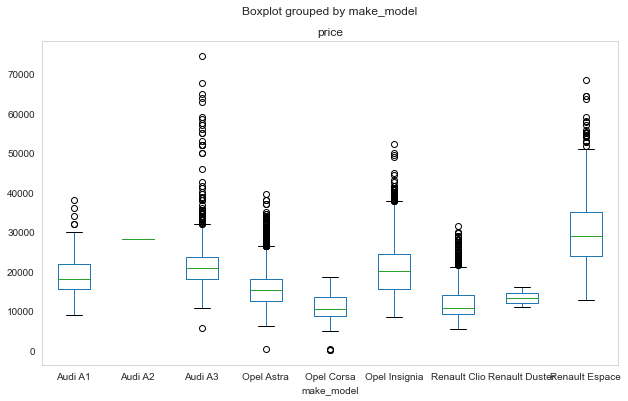

In [9]:
df.boxplot(by ='make_model', column =['price'], grid = False)

# Audi A3

In [10]:
df[(df.make_model == "Audi A3")&(df.price <= 10000)]

,make_model,body_type,price,vat,km,body_color,paint_type,nr._of_doors,nr._of_seats,gearing_type,displacement,cylinders,drive_chain,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,age,previous_owners_2,hp_kw,type_1,fuel_type,warranty_2,upholstery_type,upholstery_color,weight_kg,consumption_comb
3235,Audi A3,Station wagon,5555,VAT deductible,5558.000,Orange,Metallic,5.000,5.000,Manual,1968.000,4.000,front,Euro 6,"Air conditioning,Electrical side mirrors,Hill ...","Bluetooth,CD player,MP3,On-board computer,Radio","Alloy wheels,Voice Control","ABS,Central door lock with remote control,Driv...",6.000,1.000,1.000,110.000,Used,Diesel,48.000,Cloth,Grey,1465.000,4.800


In [11]:
df.price[(df.make_model == "Audi A3")&(df.price == 5555)] = 55550

In [12]:
df[(df.make_model == "Audi A3")&(df.price == 55550)]

,make_model,body_type,price,vat,km,body_color,paint_type,nr._of_doors,nr._of_seats,gearing_type,displacement,cylinders,drive_chain,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,age,previous_owners_2,hp_kw,type_1,fuel_type,warranty_2,upholstery_type,upholstery_color,weight_kg,consumption_comb
3235,Audi A3,Station wagon,55550,VAT deductible,5558.000,Orange,Metallic,5.000,5.000,Manual,1968.000,4.000,front,Euro 6,"Air conditioning,Electrical side mirrors,Hill ...","Bluetooth,CD player,MP3,On-board computer,Radio","Alloy wheels,Voice Control","ABS,Central door lock with remote control,Driv...",6.000,1.000,1.000,110.000,Used,Diesel,48.000,Cloth,Grey,1465.000,4.800


# Renault Espace

In [13]:
df[(df.make_model == "Renault Espace")&(df.price >= 50000)]

,make_model,body_type,price,vat,km,body_color,paint_type,nr._of_doors,nr._of_seats,gearing_type,displacement,cylinders,drive_chain,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,age,previous_owners_2,hp_kw,type_1,fuel_type,warranty_2,upholstery_type,upholstery_color,weight_kg,consumption_comb
15392,Renault Espace,Van,56950,VAT deductible,11.000,Black,Metallic,5.000,5.000,Semi-automatic,1997.000,4.000,front,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Adaptive Cruise Control,Daytime running li...",6.000,0.000,1.000,146.000,New,Diesel,60.000,Part leather,Grey,1779.000,5.400
15807,Renault Espace,Van,57990,VAT deductible,5000.000,Grey,Metallic,5.000,5.000,Automatic,1798.000,4.000,4WD,Euro 6,"Air conditioning,Armrest,Automatic climate con...","CD player,On-board computer,Radio",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Elect...",7.000,0.000,1.000,165.000,Demonstration,Benzine,60.000,Full leather,Brown,1647.000,7.600
15808,Renault Espace,Van,58950,VAT deductible,1136.000,Grey,Metallic,5.000,7.000,Automatic,1798.000,4.000,front,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Hands-free equipment,Radio","Alloy wheels,Voice Control","ABS,Adaptive Cruise Control,Alarm system,Blind...",7.000,0.000,1.000,165.000,Demonstration,Benzine,60.000,Full leather,Brown,1624.000,6.800
15809,Renault Espace,Van,57800,VAT deductible,1000.000,Grey,Metallic,5.000,7.000,Automatic,1798.000,4.000,4WD,Euro 6,"Air conditioning,Armrest,Automatic climate con...","CD player,On-board computer,Radio",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Elect...",7.000,0.000,1.000,165.000,Demonstration,Benzine,60.000,Full leather,Brown,1624.000,6.800
15810,Renault Espace,Van,55800,VAT deductible,1000.000,Grey,Metallic,5.000,7.000,Automatic,1798.000,4.000,4WD,Euro 6,"Air conditioning,Armrest,Automatic climate con...","CD player,On-board computer,Radio",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Elect...",7.000,0.000,1.000,165.000,Demonstration,Benzine,60.000,Full leather,Brown,1624.000,6.800
15811,Renault Espace,Van,55285,VAT deductible,12.000,Grey,Metallic,5.000,7.000,Automatic,1798.000,4.000,4WD,Euro 6,"Air conditioning,Armrest,Automatic climate con...","CD player,On-board computer,Radio",Alloy wheels,"ABS,Adaptive Cruise Control,Central door lock,...",7.000,0.000,1.000,165.000,Used,Benzine,60.000,Full leather,Brown,1624.000,6.800
15812,Renault Espace,Van,54982,VAT deductible,11.000,White,Metallic,5.000,7.000,Automatic,1798.000,4.000,4WD,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",7.000,0.000,1.000,165.000,New,Benzine,60.000,Part leather,Black,1647.000,7.600
15813,Renault Espace,Van,54500,VAT deductible,2839.000,Grey,Metallic,5.000,7.000,Automatic,1798.000,4.000,4WD,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,On-board computer,Radi...",Alloy wheels,"ABS,Adaptive Cruise Control,Central door lock,...",7.000,0.000,1.000,165.000,Used,Benzine,60.000,Full leather,Brown,1647.000,7.400
15814,Renault Espace,Van,54982,VAT deductible,11.000,White,Metallic,5.000,7.000,Automatic,1798.000,4.000,4WD,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",7.000,0.000,1.000,165.000,New,Benzine,60.000,Part leather,Black,1647.000,7.600
15815,Renault Espace,Van,54925,VAT deductible,14178.000,Grey,Metallic,5.000,7.000,Automatic,1798.000,4.000,front,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Hands-free equipment,Radio","Alloy wheels,Voice Control","ABS,Alarm system,Blind spot monitor,Daytime ru...",7.000,0.000,1.000,165.000,Demonstration,Benzine,60.000,Full leather,Brown,1647.000,7.600


# Opel Corsa

In [14]:
df[(df["price"] <4000)]

,make_model,body_type,price,vat,km,body_color,paint_type,nr._of_doors,nr._of_seats,gearing_type,displacement,cylinders,drive_chain,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,age,previous_owners_2,hp_kw,type_1,fuel_type,warranty_2,upholstery_type,upholstery_color,weight_kg,consumption_comb
6066,Opel Astra,Station wagon,255,VAT deductible,5563.000,Gold,Metallic,5.000,5.000,Manual,1598.000,4.000,front,Euro 6,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,Hands-free equipment,On-board comput...",Roof rack,"ABS,Central door lock with remote control,Dayt...",6.000,1.000,1.000,100.000,Used,Diesel,48.000,Cloth,Grey,1403.000,3.800
8594,Opel Corsa,Sedans,13,VAT deductible,123.000,Gold,Metallic,3.000,5.000,Manual,1398.000,4.000,front,Euro 6,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive headlights,Central door lock with...",5.000,1.000,1.000,66.000,Used,Benzine,48.000,Cloth,Black,1141.000,5.600
8828,Opel Corsa,Compact,120,VAT deductible,12.000,Grey,Metallic,5.000,5.000,Manual,999.000,3.000,front,Euro 6,"Air conditioning,Automatic climate control,Cru...","Digital radio,On-board computer,Radio","Alloy wheels,Sport suspension","Central door lock,Daytime running lights,Drive...",6.000,0.000,1.000,66.000,New,Benzine,60.000,Cloth,Black,1099.000,4.600
8829,Opel Corsa,Other,331,VAT deductible,10.000,White,Metallic,5.000,5.000,Manual,999.000,3.000,front,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Hands-free equipment,On-board computer,Radio","Alloy wheels,Sport package","ABS,Central door lock,Driver-side airbag,Elect...",6.000,0.000,1.000,66.000,New,Benzine,60.000,Cloth,Black,1163.000,4.700


In [15]:
df.drop(index = [8594, 8828, 6066,8829], axis = 0, inplace = True)

# km

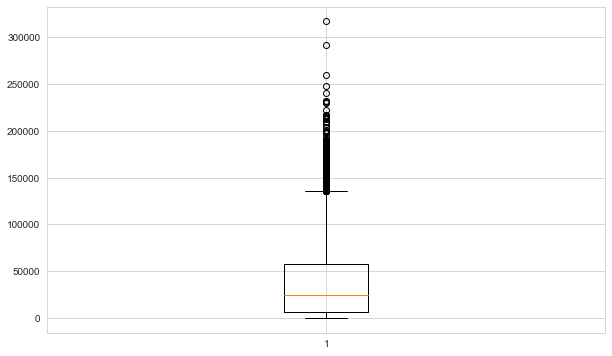

In [16]:
plt.boxplot(df.km);

In [17]:
# Domain araştırması sonucu outlier gibi görünen kayıtların outlier olmadığına grup olarak karar verildi

df[(df.km >= 250000)]

,make_model,body_type,price,vat,km,body_color,paint_type,nr._of_doors,nr._of_seats,gearing_type,displacement,cylinders,drive_chain,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,age,previous_owners_2,hp_kw,type_1,fuel_type,warranty_2,upholstery_type,upholstery_color,weight_kg,consumption_comb
3003,Audi A3,Sedans,14980,VAT deductible,291800.000,Blue,Metallic,4.000,5.000,Manual,1968.000,4.000,4WD,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport package,Sport seats,Sport s...","ABS,Adaptive headlights,Central door lock,Dayt...",6.000,3.000,1.000,110.000,Used,Diesel,24.000,Cloth,Black,1385.000,4.700
5712,Opel Astra,Station wagon,6000,VAT deductible,260000.000,Silver,Metallic,5.000,5.000,Automatic,1598.000,4.000,front,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Roof rack,Touch screen,Trailer hi...","ABS,Central door lock,Central door lock with r...",6.000,3.000,1.000,100.000,Used,Diesel,24.000,Part leather,Grey,1425.000,4.500
9279,Opel Corsa,Sedans,8350,VAT deductible,317000.000,Red,Metallic,3.000,5.000,Manual,1398.000,4.000,front,Euro 6,"Air conditioning,Hill Holder,Power windows",On-board computer,Alloy wheels,"ABS,Central door lock with remote control,Dayt...",5.000,2.000,1.000,66.000,Used,Benzine,36.000,Cloth,Black,1199.000,6.000


# nr._of_doors

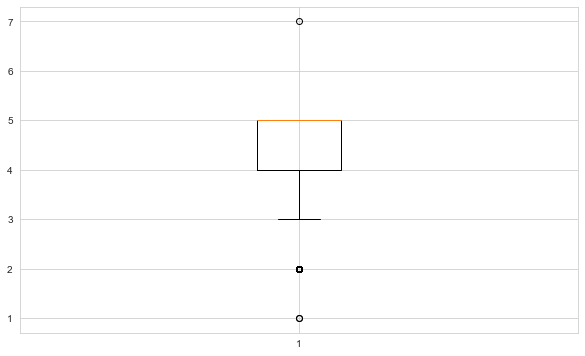

In [18]:
plt.boxplot(df["nr._of_doors"]);

In [19]:
df[(df["nr._of_doors"] == 7) | (df["nr._of_doors"] == 1)]

,make_model,body_type,price,vat,km,body_color,paint_type,nr._of_doors,nr._of_seats,gearing_type,displacement,cylinders,drive_chain,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,age,previous_owners_2,hp_kw,type_1,fuel_type,warranty_2,upholstery_type,upholstery_color,weight_kg,consumption_comb
13782,Renault Clio,Compact,8500,VAT deductible,41493.000,White,Metallic,1.000,5.000,Manual,1461.000,4.000,front,Euro 6,"Air conditioning,Cruise control,Hill Holder,Mu...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",5.000,3.000,1.000,55.000,Used,Diesel,12.000,Cloth,Grey,1165.000,3.300
13785,Renault Clio,Compact,8500,VAT deductible,120620.000,White,Metallic,1.000,5.000,Manual,1461.000,4.000,front,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,On-board computer",Alloy wheels,Central door lock,5.000,3.000,1.000,66.000,Used,Diesel,6.000,Cloth,Grey,1165.000,4.900
15202,Renault Espace,Van,21600,Price negotiable,78000.000,Brown,Metallic,7.000,5.000,Automatic,1598.000,4.000,front,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,MP3,On-board computer,...","Alloy wheels,Touch screen","ABS,Blind spot monitor,Central door lock,Dayti...",6.000,3.000,1.000,118.000,Used,Diesel,24.000,Full leather,Brown,1734.000,4.600


In [20]:
df["nr._of_doors"][(df["nr._of_doors"] == 7) | (df["nr._of_doors"] == 1)] = 5

In [21]:
df[(df["nr._of_doors"] == 2)]

,make_model,body_type,price,vat,km,body_color,paint_type,nr._of_doors,nr._of_seats,gearing_type,displacement,cylinders,drive_chain,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,age,previous_owners_2,hp_kw,type_1,fuel_type,warranty_2,upholstery_type,upholstery_color,weight_kg,consumption_comb
26,Audi A1,Compact,11444,VAT deductible,84029.000,Blue,Metallic,2.000,4.000,Manual,999.000,3.000,front,Euro 6,"Air conditioning,Automatic climate control,Ele...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",5.000,3.000,1.000,70.000,Used,Benzine,24.000,Cloth,Black,1065.000,4.200
44,Audi A1,Sedans,11490,VAT deductible,44120.000,Black,Metallic,2.000,4.000,Manual,1422.000,3.000,front,Euro 6,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,Hands-free equipment,MP3,On-board co...",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",5.000,3.000,1.000,66.000,Used,Diesel,24.000,Cloth,Black,1110.000,3.600
48,Audi A1,Compact,11490,VAT deductible,58000.000,Black,Metallic,2.000,4.000,Manual,999.000,4.000,front,Euro 6,"Air conditioning,Electrical side mirrors,Leath...","Bluetooth,CD player","Alloy wheels,Sport seats,Sport suspension","ABS,Central door lock,Daytime running lights,D...",5.000,3.000,2.000,60.000,Used,Benzine,24.000,Part leather,Black,1110.000,4.400
55,Audi A1,Compact,10999,VAT deductible,69500.000,Black,Metallic,2.000,4.000,Manual,999.000,3.000,front,Euro 5,"Air conditioning,Armrest,Automatic climate con...",CD player,Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",5.000,2.000,1.000,70.000,Used,Benzine,36.000,Cloth,Black,1250.000,4.400
56,Audi A1,Compact,10900,VAT deductible,43500.000,White,Metallic,2.000,4.000,Manual,999.000,3.000,front,Euro 6,"Air conditioning,Electrical side mirrors,Power...","CD player,On-board computer,Radio",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",5.000,3.000,1.000,60.000,Used,Benzine,24.000,Cloth,Black,1250.000,4.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10305,Opel Corsa,Compact,10490,VAT deductible,15.000,Blue,Metallic,2.000,5.000,Manual,1229.000,4.000,front,Euro 6,"Electrical side mirrors,Power windows","Bluetooth,Hands-free equipment,MP3,On-board co...",Catalytic Converter,"ABS,Central door lock,Driver-side airbag,Elect...",5.000,0.000,1.000,51.000,New,Benzine,60.000,Cloth,Other,1163.000,5.400
10314,Opel Corsa,Compact,9990,VAT deductible,100.000,Blue,Metallic,2.000,5.000,Manual,1229.000,4.000,front,Euro 6,"Air conditioning,Electrical side mirrors,Hill ...","Bluetooth,CD player,Hands-free equipment,On-bo...",Voice Control,"ABS,Central door lock,Daytime running lights,D...",5.000,0.000,1.000,51.000,New,Benzine,60.000,Cloth,Black,1163.000,5.400
10380,Opel Corsa,Compact,11290,VAT deductible,12.000,Red,Metallic,2.000,5.000,Manual,1229.000,4.000,front,Euro 6,"Air conditioning,Electrical side mirrors,Power...","Bluetooth,Hands-free equipment,Radio",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",5.000,0.000,1.000,51.000,Pre-registered,Benzine,60.000,Cloth,Black,1156.000,5.400
10413,Opel Corsa,Compact,11190,VAT deductible,10.000,Blue,Metallic,2.000,5.000,Manual,1229.000,4.000,front,Euro 6,"Air conditioning,Electrical side mirrors,Hill ...","Radio,Sound system",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",5.000,0.000,1.000,51.000,Pre-registered,Benzine,60.000,Cloth,Black,1120.000,5.400


# nr._of_seats

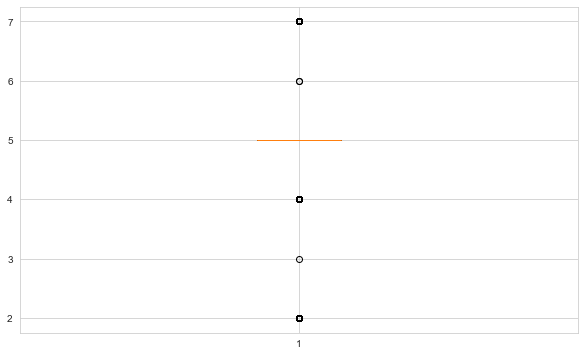

In [22]:
plt.boxplot(df["nr._of_seats"]);

In [23]:
df[(df["nr._of_seats"] == 6) | (df["nr._of_seats"] == 3)]

,make_model,body_type,price,vat,km,body_color,paint_type,nr._of_doors,nr._of_seats,gearing_type,displacement,cylinders,drive_chain,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,age,previous_owners_2,hp_kw,type_1,fuel_type,warranty_2,upholstery_type,upholstery_color,weight_kg,consumption_comb
582,Audi A1,Compact,13500,VAT deductible,100000.000,White,Metallic,5.000,6.000,Manual,1000.000,4.000,front,Euro 6,Air conditioning,On-board computer,Alloy wheels,ABS,5.000,2.000,1.000,70.000,Used,Benzine,12.000,Cloth,Black,1500.000,4.400
1636,Audi A1,Compact,23090,VAT deductible,9821.000,Black,Metallic,2.000,3.000,Automatic,1798.000,4.000,front,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Catalytic Converter,Sport package...","ABS,Central door lock,Daytime running lights,D...",7.000,1.000,1.000,141.000,Used,Benzine,48.000,Part leather,Black,1240.000,5.800
15890,Renault Espace,Station wagon,42490,VAT deductible,77450.063,Black,Metallic,5.000,6.000,Automatic,1997.000,4.000,front,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Touch screen","ABS,Blind spot monitor,Central door lock,Dayti...",6.000,3.000,1.000,147.000,New,Diesel,24.000,Cloth,Other,1840.000,5.700


In [24]:
df["nr._of_seats"][(df["nr._of_seats"] == 6) & (df["make_model"] == "Audi A1")] = 5

In [25]:
df["nr._of_seats"][(df["nr._of_seats"] == 3) & (df["make_model"] == "Audi A1")] = 5

In [26]:
df["nr._of_seats"][(df["nr._of_seats"] == 6) & (df["make_model"] == "Renault Espace")] = 7

# displacement (cc)

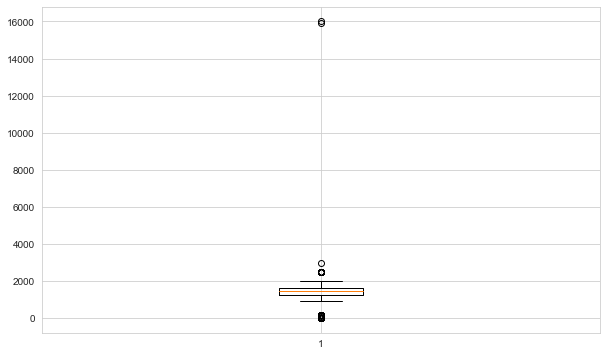

In [27]:
plt.boxplot(df["displacement"]);

In [28]:
df[(df.displacement >= 4000)]

,make_model,body_type,price,vat,km,body_color,paint_type,nr._of_doors,nr._of_seats,gearing_type,displacement,cylinders,drive_chain,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,age,previous_owners_2,hp_kw,type_1,fuel_type,warranty_2,upholstery_type,upholstery_color,weight_kg,consumption_comb
7169,Opel Astra,Station wagon,18490,VAT deductible,22327.000,Green,Metallic,5.000,5.000,Automatic,15898.000,4.000,front,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,MP3,On-board co...","Alloy wheels,Touch screen,Voice Control","ABS,Central door lock,Daytime running lights,D...",6.000,1.000,1.000,100.000,Employee's car,Benzine,48.000,Cloth,Black,1388.000,4.500
10932,Opel Insignia,Station wagon,14300,Price negotiable,76500.000,Grey,Metallic,5.000,5.000,Manual,16000.000,4.000,front,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Hands-free equipment,MP3,On-board co...","Alloy wheels,Touch screen,Voice Control","ABS,Central door lock,Daytime running lights,D...",6.000,3.000,1.000,88.000,Used,Diesel,24.000,Full leather,Black,1733.000,4.100


In [29]:
df.displacement[(df.displacement == 15898.00)] = 1596

In [30]:
df.displacement[(df.displacement == 16000.000)] = 1596

In [31]:
df[(df.displacement <= 900)]

,make_model,body_type,price,vat,km,body_color,paint_type,nr._of_doors,nr._of_seats,gearing_type,displacement,cylinders,drive_chain,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,age,previous_owners_2,hp_kw,type_1,fuel_type,warranty_2,upholstery_type,upholstery_color,weight_kg,consumption_comb
7809,Opel Astra,Sedans,23940,VAT deductible,12.000,Black,Metallic,5.000,5.000,Automatic,139.000,4.000,front,Euro 6,"Air conditioning,Armrest,Automatic climate con...","MP3,On-board computer,Radio,USB","Alloy wheels,Catalytic Converter","ABS,Central door lock,Daytime running lights,D...",6.000,0.000,1.000,110.000,Pre-registered,Benzine,60.000,Cloth,Black,1352.000,6.100
7810,Opel Astra,Sedans,23940,VAT deductible,12.000,Silver,Metallic,5.000,5.000,Automatic,139.000,4.000,front,Euro 6,"Air conditioning,Armrest,Automatic climate con...","MP3,On-board computer,Radio,USB","Alloy wheels,Catalytic Converter","ABS,Central door lock,Daytime running lights,D...",6.000,0.000,1.000,110.000,Pre-registered,Benzine,60.000,Cloth,Black,1352.000,6.100
7811,Opel Astra,Sedans,23940,VAT deductible,12.000,Grey,Metallic,5.000,5.000,Automatic,139.000,4.000,front,Euro 6,"Air conditioning,Armrest,Automatic climate con...","MP3,On-board computer,Radio,USB","Alloy wheels,Catalytic Converter","ABS,Central door lock,Daytime running lights,D...",6.000,0.000,1.000,110.000,Pre-registered,Benzine,60.000,Cloth,Black,1352.000,6.100
7812,Opel Astra,Sedans,23940,VAT deductible,12.000,Blue,Metallic,5.000,5.000,Automatic,139.000,4.000,front,Euro 6,"Air conditioning,Armrest,Automatic climate con...","On-board computer,Radio,USB","Alloy wheels,Catalytic Converter","ABS,Central door lock,Daytime running lights,D...",6.000,0.000,1.000,110.000,Pre-registered,Benzine,60.000,Cloth,Black,1352.000,6.100
8128,Opel Astra,Station wagon,18830,VAT deductible,10.000,White,Metallic,5.000,5.000,Manual,140.000,4.000,front,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,MP3,On-board computer,Radio","Alloy wheels,Roof rack,Sport seats","ABS,Central door lock,Driver-side airbag,Elect...",6.000,0.000,1.000,92.000,Demonstration,Benzine,60.000,Cloth,Black,1403.000,5.900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15575,Renault Espace,Van,31900,VAT deductible,1.000,White,Metallic,5.000,7.000,Automatic,160.000,4.000,4WD,Euro 6,"Air conditioning,Automatic climate control,Cru...","Radio,USB",Alloy wheels,"ABS,Isofix,Power steering,Side airbag",6.000,0.000,1.000,118.000,Pre-registered,Diesel,60.000,Full leather,Black,1659.000,4.700
15576,Renault Espace,Van,31900,VAT deductible,1.000,White,Metallic,5.000,7.000,Automatic,160.000,4.000,4WD,Euro 6,"Air conditioning,Automatic climate control,Cru...","Radio,USB",Alloy wheels,"ABS,Isofix,Power steering,Side airbag",6.000,0.000,1.000,118.000,Pre-registered,Diesel,60.000,Full leather,Black,1659.000,4.700
15577,Renault Espace,Van,31900,VAT deductible,1.000,White,Metallic,5.000,7.000,Automatic,160.000,4.000,4WD,Euro 6,"Air conditioning,Automatic climate control,Cru...","Radio,USB",Alloy wheels,"ABS,Isofix,Power steering,Side airbag",6.000,0.000,1.000,118.000,Pre-registered,Diesel,60.000,Full leather,Black,1659.000,4.700
15578,Renault Espace,Van,31900,VAT deductible,1.000,White,Metallic,5.000,7.000,Automatic,160.000,4.000,4WD,Euro 6,"Air conditioning,Automatic climate control,Cru...","Radio,USB",Alloy wheels,"ABS,Isofix,Power steering,Side airbag",6.000,0.000,1.000,118.000,Pre-registered,Diesel,60.000,Full leather,Black,1659.000,4.700


In [32]:
df.displacement[(df.displacement <= 900)].value_counts(dropna=False)

898.000    371
1.000       36
899.000     11
160.000      6
139.000      4
900.000      4
2.000        2
140.000      1
122.000      1
890.000      1
54.000       1
Name: displacement, dtype: int64

In [33]:
df[(df.displacement <= 800)]

,make_model,body_type,price,vat,km,body_color,paint_type,nr._of_doors,nr._of_seats,gearing_type,displacement,cylinders,drive_chain,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,age,previous_owners_2,hp_kw,type_1,fuel_type,warranty_2,upholstery_type,upholstery_color,weight_kg,consumption_comb
7809,Opel Astra,Sedans,23940,VAT deductible,12.000,Black,Metallic,5.000,5.000,Automatic,139.000,4.000,front,Euro 6,"Air conditioning,Armrest,Automatic climate con...","MP3,On-board computer,Radio,USB","Alloy wheels,Catalytic Converter","ABS,Central door lock,Daytime running lights,D...",6.000,0.000,1.000,110.000,Pre-registered,Benzine,60.000,Cloth,Black,1352.000,6.100
7810,Opel Astra,Sedans,23940,VAT deductible,12.000,Silver,Metallic,5.000,5.000,Automatic,139.000,4.000,front,Euro 6,"Air conditioning,Armrest,Automatic climate con...","MP3,On-board computer,Radio,USB","Alloy wheels,Catalytic Converter","ABS,Central door lock,Daytime running lights,D...",6.000,0.000,1.000,110.000,Pre-registered,Benzine,60.000,Cloth,Black,1352.000,6.100
7811,Opel Astra,Sedans,23940,VAT deductible,12.000,Grey,Metallic,5.000,5.000,Automatic,139.000,4.000,front,Euro 6,"Air conditioning,Armrest,Automatic climate con...","MP3,On-board computer,Radio,USB","Alloy wheels,Catalytic Converter","ABS,Central door lock,Daytime running lights,D...",6.000,0.000,1.000,110.000,Pre-registered,Benzine,60.000,Cloth,Black,1352.000,6.100
7812,Opel Astra,Sedans,23940,VAT deductible,12.000,Blue,Metallic,5.000,5.000,Automatic,139.000,4.000,front,Euro 6,"Air conditioning,Armrest,Automatic climate con...","On-board computer,Radio,USB","Alloy wheels,Catalytic Converter","ABS,Central door lock,Daytime running lights,D...",6.000,0.000,1.000,110.000,Pre-registered,Benzine,60.000,Cloth,Black,1352.000,6.100
8128,Opel Astra,Station wagon,18830,VAT deductible,10.000,White,Metallic,5.000,5.000,Manual,140.000,4.000,front,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,MP3,On-board computer,Radio","Alloy wheels,Roof rack,Sport seats","ABS,Central door lock,Driver-side airbag,Elect...",6.000,0.000,1.000,92.000,Demonstration,Benzine,60.000,Cloth,Black,1403.000,5.900
10194,Opel Corsa,Compact,10940,VAT deductible,12.000,White,Uni/basic,3.000,5.000,Manual,122.000,4.000,front,Euro 6,"Air conditioning,Electrical side mirrors,Hill ...","On-board computer,Radio",Catalytic Converter,"ABS,Central door lock,Daytime running lights,D...",5.000,0.000,1.000,51.000,Pre-registered,Benzine,60.000,Cloth,Black,1162.000,5.900
10559,Opel Insignia,Station wagon,16950,VAT deductible,84700.000,Silver,Metallic,5.000,5.000,Automatic,2.000,4.000,front,Euro 6,"Air conditioning,Automatic climate control,Cru...",Sound system,"Alloy wheels,Roof rack","Blind spot monitor,Tire pressure monitoring sy...",6.000,3.000,1.000,125.000,Used,Diesel,24.000,Full leather,Black,1929.000,5.500
12467,Opel Insignia,Station wagon,37490,VAT deductible,9841.246,Grey,Metallic,5.000,5.000,Automatic,1.000,4.000,front,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,MP3,Radio","Alloy wheels,Roof rack","ABS,Central door lock,Driver-side airbag,Elect...",6.000,0.000,1.000,100.000,Demonstration,Diesel,60.000,Part leather,Black,1552.000,5.400
12473,Opel Insignia,Station wagon,34490,VAT deductible,9841.246,Silver,Metallic,5.000,5.000,Automatic,1.000,4.000,front,Euro 6,"Air conditioning,Automatic climate control,Cru...",Bluetooth,"Alloy wheels,Roof rack,Sport package,Sport seats","ABS,Central door lock,Driver-side airbag,Elect...",6.000,0.000,1.000,100.000,Demonstration,Diesel,60.000,Part leather,Black,1582.000,5.400
12484,Opel Insignia,Sedans,33990,VAT deductible,10.000,Black,Metallic,5.000,5.000,Automatic,1.000,4.000,front,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,On-board computer",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Elect...",6.000,0.000,1.000,100.000,Demonstration,Diesel,60.000,Part leather,Black,1618.000,5.1

In [34]:
df[(df.make_model == "Audi A1") & (df.body_type == "Compact")]

,make_model,body_type,price,vat,km,body_color,paint_type,nr._of_doors,nr._of_seats,gearing_type,displacement,cylinders,drive_chain,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,age,previous_owners_2,hp_kw,type_1,fuel_type,warranty_2,upholstery_type,upholstery_color,weight_kg,consumption_comb
7,Audi A1,Compact,14480,VAT deductible,14986.000,Red,Metallic,5.000,5.000,Automatic,1422.000,3.000,front,Euro 6,"Air conditioning,Armrest,Electrical side mirro...","CD player,MP3,Radio",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",7.000,3.000,1.000,66.000,Used,Diesel,24.000,Cloth,Black,1065.000,3.700
18,Audi A1,Compact,18400,VAT deductible,50280.000,Black,Metallic,5.000,5.000,Automatic,999.000,3.000,front,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",7.000,3.000,1.000,70.000,Used,Benzine,6.000,Cloth,Grey,1065.000,4.500
26,Audi A1,Compact,11444,VAT deductible,84029.000,Blue,Metallic,2.000,4.000,Manual,999.000,3.000,front,Euro 6,"Air conditioning,Automatic climate control,Ele...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",5.000,3.000,1.000,70.000,Used,Benzine,24.000,Cloth,Black,1065.000,4.200
29,Audi A1,Compact,11290,VAT deductible,22000.000,Black,Metallic,4.000,4.000,Manual,999.000,3.000,front,Euro 6,"Air conditioning,Electrical side mirrors,Power...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",5.000,3.000,1.000,70.000,Used,Benzine,24.000,Cloth,Black,1065.000,4.400
30,Audi A1,Compact,11290,VAT deductible,38400.000,Black,Metallic,5.000,5.000,Manual,1422.000,3.000,front,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",5.000,3.000,1.000,66.000,Used,Diesel,12.000,Cloth,Black,1195.000,3.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,Audi A1,Compact,21920,VAT deductible,1699.000,White,Metallic,4.000,5.000,Manual,999.000,3.000,front,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,Sound system,USB","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",6.000,0.000,1.000,85.000,Demonstration,Benzine,60.000,Cloth,Black,1165.000,4.900
2596,Audi A1,Compact,21900,VAT deductible,32.000,White,Metallic,5.000,4.000,Manual,999.000,3.000,front,Euro 6,"Air conditioning,Armrest,Cruise control,Electr...","On-board computer,Radio",Alloy wheels,"ABS,Alarm system,Central door lock,Driver-side...",5.000,0.000,1.000,71.000,Used,Benzine,60.000,Cloth,Black,1035.000,4.200
2600,Audi A1,Compact,21850,VAT deductible,6000.000,Grey,Metallic,4.000,4.000,Manual,999.000,3.000,front,Euro 6,"Air conditioning,Armrest,Electrical side mirro...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",6.000,0.000,1.000,85.000,Used,Benzine,12.000,Cloth,Black,1035.000,4.900
2603,Audi A1,Compact,21800,VAT deductible,4000.000,Grey,Metallic,4.000,5.000,Manual,999.000,3.000,front,Euro 6,"Air conditioning,Electrical side mirrors,Hill ...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Touch screen,Voice Control","ABS,Central door lock,Daytime running lights,D...",6.000,0.000,1.000,85.000,Used,Benzine,60.000,Cloth,Black,1035.000,4.900


In [35]:
df.displacement[(df.displacement < 999) & (df.make_model == "Audi A1") & (df.body_type == "Compact")] = 999

In [36]:
df.displacement[(df.displacement < 999) & (df.make_model == "Renault Espace") & (df.body_type == "Van")] = 1600

In [37]:
df.displacement[(df.displacement < 800)]

7809    139.000
7810    139.000
7811    139.000
7812    139.000
8128    140.000
10194   122.000
10559     2.000
12467     1.000
12473     1.000
12484     1.000
12499     1.000
12501     1.000
12554     1.000
12604     1.000
12670     1.000
12750     1.000
12768     1.000
12769     1.000
12781     1.000
12783     1.000
12786     1.000
12790     1.000
12796     1.000
12798     1.000
12800     1.000
12815     1.000
12823     1.000
12835     1.000
12848     1.000
12849     1.000
13904     1.000
13912    54.000
14198     2.000
14284     1.000
14314     1.000
14315     1.000
14319     1.000
14320     1.000
14321     1.000
14322     1.000
14324     1.000
14325     1.000
14326     1.000
14327     1.000
14328     1.000
Name: displacement, dtype: float64

In [38]:
df.displacement[(df.displacement < 999) & (df.make_model == "Opel Astra")] = 1400

In [39]:
df.displacement[(df.displacement < 999) & (df.make_model == "Renault Clio")] = 1000

In [40]:
df.displacement[(df.displacement < 999) & (df.make_model == "Opel Insignia")] = 1600

In [41]:
df.displacement[(df.displacement < 800)]  = df.displacement[(df.make_model == "Opel Corsa") & (df.body_type == "Compact")].mode()[0]

In [42]:
df.displacement[(df.make_model == "Opel Corsa") & (df.body_type == "Compact")].mode()[0]

1398.0

In [43]:
df[(df.displacement <= 800)]

,make_model,body_type,price,vat,km,body_color,paint_type,nr._of_doors,nr._of_seats,gearing_type,displacement,cylinders,drive_chain,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,age,previous_owners_2,hp_kw,type_1,fuel_type,warranty_2,upholstery_type,upholstery_color,weight_kg,consumption_comb


# cylinders

<AxesSubplot:title={'center':'cylinders'}, xlabel='[make_model]'>

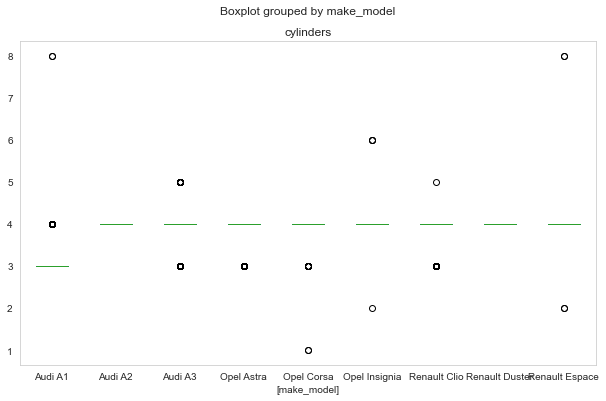

In [44]:
df.boxplot(by =['make_model'], column =['cylinders'], grid = False)

In [45]:
df[(df.cylinders == 8)]

,make_model,body_type,price,vat,km,body_color,paint_type,nr._of_doors,nr._of_seats,gearing_type,displacement,cylinders,drive_chain,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,age,previous_owners_2,hp_kw,type_1,fuel_type,warranty_2,upholstery_type,upholstery_color,weight_kg,consumption_comb
535,Audi A1,Compact,12990,VAT deductible,41200.000,Silver,Metallic,5.000,4.000,Manual,999.000,8.000,front,Euro 4,"Air conditioning,Automatic climate control,Ele...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Ski bag,Sport suspension","ABS,Alarm system,Central door lock,Driver-side...",5.000,3.000,1.000,70.000,Used,Benzine,24.000,Cloth,Black,1285.000,13.800
536,Audi A1,Compact,13860,VAT deductible,92602.000,Black,Metallic,4.000,4.000,Manual,1598.000,8.000,front,Euro 6,"Air conditioning,Armrest,Electrical side mirro...","Bluetooth,CD player,Hands-free equipment,On-bo...",Voice Control,"ABS,Central door lock,Driver-side airbag,Elect...",5.000,3.000,1.000,85.000,Used,Diesel,24.000,Cloth,Black,1285.000,4.000
15055,Renault Espace,Van,24990,VAT deductible,47423.000,Black,Metallic,5.000,7.000,Automatic,1598.000,8.000,front,Euro 6,Park Distance Control,"Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Blind spot monitor,Central door lock,Dayti...",6.000,2.000,1.000,117.000,Used,Diesel,3.000,Full leather,Black,1734.000,4.600
15056,Renault Espace,Van,24990,VAT deductible,38002.000,White,Metallic,5.000,7.000,Automatic,1598.000,8.000,front,Euro 6,"Cruise control,Sunroof","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Driver-side airbag,Passenger-side airbag,S...",6.000,3.000,1.000,117.000,Used,Diesel,12.000,Full leather,Black,1734.000,4.600


In [46]:
df.cylinders[(df.cylinders == 8)] = 4

In [47]:
df[(df.cylinders < 3)]

,make_model,body_type,price,vat,km,body_color,paint_type,nr._of_doors,nr._of_seats,gearing_type,displacement,cylinders,drive_chain,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,age,previous_owners_2,hp_kw,type_1,fuel_type,warranty_2,upholstery_type,upholstery_color,weight_kg,consumption_comb
9956,Opel Corsa,Compact,16625,VAT deductible,100.000,Black,Metallic,3.000,5.000,Automatic,1398.000,1.000,front,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,M...","Alloy wheels,Sport suspension","ABS,Central door lock,Daytime running lights,D...",6.000,0.000,1.000,66.000,Pre-registered,Benzine,60.000,Cloth,Black,1163.000,6.000
9957,Opel Corsa,Compact,16690,VAT deductible,50.000,Grey,Metallic,4.000,5.000,Automatic,1398.000,1.000,front,Euro 6,"Air conditioning,Cruise control,Electrically h...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Touch screen","ABS,Central door lock,Daytime running lights,D...",6.000,0.000,1.000,66.000,Pre-registered,Benzine,60.000,Cloth,Black,1163.000,6.200
11342,Opel Insignia,Station wagon,21900,VAT deductible,13600.000,Grey,Metallic,5.000,5.000,Automatic,1598.000,2.000,front,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,M...","Alloy wheels,Catalytic Converter,Touch screen,...","ABS,Central door lock with remote control,Driv...",6.000,1.000,1.000,100.000,Employee's car,Diesel,48.000,Part leather,Black,1560.000,4.600
15835,Renault Espace,Van,47590,VAT deductible,6000.000,Black,Metallic,5.000,7.000,Automatic,1997.000,2.000,front,Euro 6,"Air conditioning,Automatic climate control,Ele...","Bluetooth,Hands-free equipment,On-board comput...",Voice Control,"ABS,Alarm system,Blind spot monitor,Central do...",6.000,0.000,1.000,147.000,Employee's car,Diesel,60.000,Full leather,Brown,1840.000,5.300
15836,Renault Espace,Van,47580,VAT deductible,2000.000,Black,Metallic,5.000,7.000,Automatic,1997.000,2.000,front,Euro 6,"Air conditioning,Automatic climate control,Cru...",Sound system,Alloy wheels,"ABS,Adaptive headlights,Blind spot monitor,Cen...",6.000,0.000,1.000,147.000,Demonstration,Diesel,60.000,Full leather,Black,1975.000,5.700


In [48]:
df.cylinders[(df.cylinders < 3)] = 4

In [49]:
df[(df.cylinders < 3)]

,make_model,body_type,price,vat,km,body_color,paint_type,nr._of_doors,nr._of_seats,gearing_type,displacement,cylinders,drive_chain,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,age,previous_owners_2,hp_kw,type_1,fuel_type,warranty_2,upholstery_type,upholstery_color,weight_kg,consumption_comb


# gears

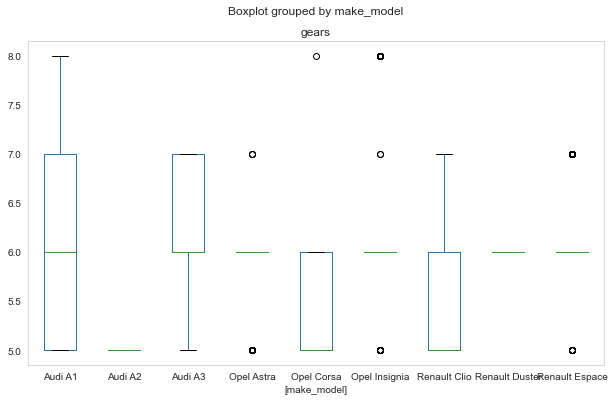

In [50]:
df.boxplot(by =['make_model'], column =['gears'], grid = False);

# hp_kw

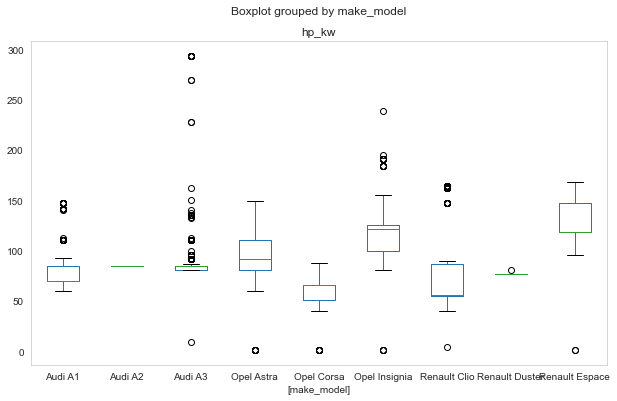

In [51]:
df.boxplot(by =['make_model'], column =['hp_kw'], grid = False);

In [52]:
df[(df.hp_kw < 25)]

,make_model,body_type,price,vat,km,body_color,paint_type,nr._of_doors,nr._of_seats,gearing_type,displacement,cylinders,drive_chain,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,age,previous_owners_2,hp_kw,type_1,fuel_type,warranty_2,upholstery_type,upholstery_color,weight_kg,consumption_comb
3913,Audi A3,Sedans,20440,VAT deductible,24000.000,Black,Metallic,5.000,5.000,Automatic,1968.000,4.000,front,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",7.000,2.000,1.000,9.000,Used,Diesel,36.000,Cloth,Black,1360.000,4.500
6005,Opel Astra,Station wagon,11600,VAT deductible,73860.000,Black,Metallic,5.000,5.000,Automatic,1400.000,4.000,front,Euro 6,"Air conditioning,Electrical side mirrors,Leath...","Bluetooth,On-board computer,Radio,USB",Roof rack,"Alarm system,Central door lock,Driver-side air...",6.000,2.000,1.000,1.000,Used,Benzine,36.000,Cloth,Grey,1985.000,3.900
6034,Opel Astra,Station wagon,11600,VAT deductible,76010.000,Silver,Metallic,5.000,5.000,Automatic,1400.000,4.000,front,Euro 6,"Air conditioning,Electrical side mirrors,Leath...","Bluetooth,On-board computer,Radio,USB",Roof rack,"Alarm system,Central door lock,Driver-side air...",6.000,2.000,1.000,1.000,Used,Benzine,36.000,Cloth,Black,1425.000,4.300
6946,Opel Astra,Station wagon,11900,VAT deductible,70090.000,Black,Metallic,5.000,5.000,Manual,1598.000,4.000,front,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,On-board computer,Radio,USB",Roof rack,"Central door lock,Driver-side airbag,Electroni...",6.000,2.000,1.000,1.000,Used,Diesel,36.000,Cloth,Other,1328.000,3.600
7014,Opel Astra,Sedans,11700,VAT deductible,79993.000,Silver,Metallic,5.000,5.000,Manual,1364.000,4.000,front,Euro 6,"Air conditioning,Automatic climate control,Cru...","CD player,Radio",Alloy wheels,"Driver-side airbag,Electronic stability contro...",6.000,2.000,1.000,1.000,Used,Benzine,36.000,Cloth,Other,1350.000,4.900
7016,Opel Astra,Sedans,11700,VAT deductible,62384.000,Black,Metallic,5.000,5.000,Manual,1364.000,4.000,front,Euro 6,"Air conditioning,Automatic climate control,Cru...","CD player,Radio",Alloy wheels,"Driver-side airbag,Electronic stability contro...",6.000,2.000,1.000,1.000,Used,Benzine,36.000,Cloth,Other,1350.000,4.900
7018,Opel Astra,Sedans,11700,VAT deductible,77272.000,Black,Metallic,5.000,5.000,Manual,1364.000,4.000,front,Euro 6,"Air conditioning,Automatic climate control,Cru...","CD player,Radio",Alloy wheels,"Driver-side airbag,Electronic stability contro...",6.000,2.000,1.000,1.000,Used,Benzine,36.000,Cloth,Other,1350.000,4.900
7019,Opel Astra,Sedans,11700,VAT deductible,69035.000,Black,Metallic,5.000,5.000,Manual,1364.000,4.000,front,Euro 6,"Air conditioning,Automatic climate control,Cru...","CD player,Radio",Alloy wheels,"Driver-side airbag,Electronic stability contro...",6.000,2.000,1.000,1.000,Used,Benzine,36.000,Cloth,Other,1350.000,4.900
9285,Opel Corsa,Sedans,8300,VAT deductible,58912.000,Black,Metallic,5.000,5.000,Manual,1229.000,4.000,front,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,On-board computer,Radio,USB",Alloy wheels,"Alarm system,Central door lock,Driver-side air...",5.000,2.000,1.000,1.000,Used,Benzine,36.000,Cloth,Black,1199.000,6.000
9287,Opel Corsa,Sedans,8300,VAT deductible,53522.000,Silver,Metallic,5.000,5.000,Manual,1229.000,4.000,front,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,On-board computer,Radio,USB",Alloy wheels,"Alarm system,Central door lock,Driver-side air...",5.000,2.000,1.000,1.000,Used,Benzine,36.000,Cloth,Black,1199.000,6.000


In [53]:
df.hp_kw.loc[df.hp_kw < 25] = np.nan

In [54]:
df.hp_kw.isnull().sum()

22

In [55]:
def fill(df, group_col1, group_col2, col_name, method): # method can be "mode" or "median" or "ffill"
    if method == "mode":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                mode1 = list(df[cond1][col_name].mode())
                mode2 = list(df[cond2][col_name].mode())
                if mode2 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mode()[0])
                elif mode1 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond1][col_name].mode()[0])
                else:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[col_name].mode()[0])

In [56]:
fill(df, "make_model", "body_type", "hp_kw", "mode")

In [57]:
df.hp_kw.isnull().sum()

0

# warranty_2

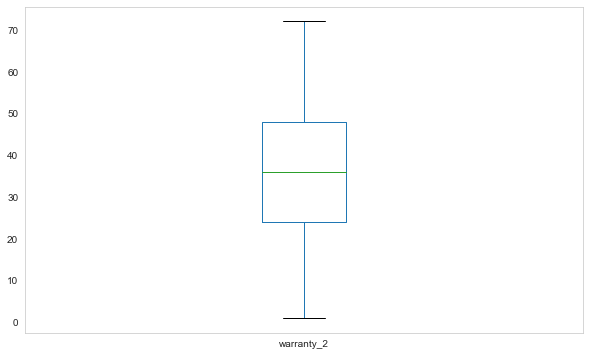

In [58]:
df.boxplot(column =['warranty_2'], grid = False);

# weight_kg

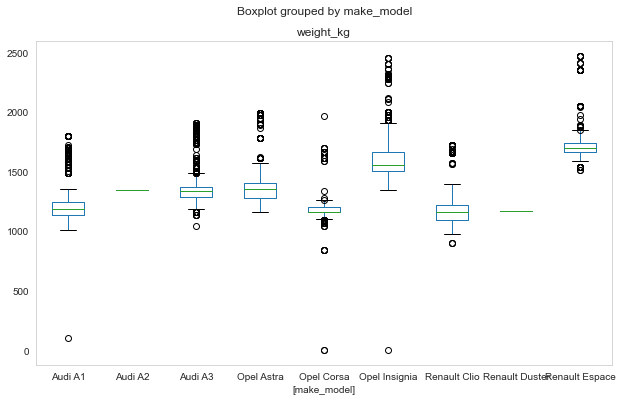

In [59]:
df.boxplot(by= ["make_model"], column =['weight_kg'], grid = False);

In [60]:
df[df.weight_kg < 500]

,make_model,body_type,price,vat,km,body_color,paint_type,nr._of_doors,nr._of_seats,gearing_type,displacement,cylinders,drive_chain,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,age,previous_owners_2,hp_kw,type_1,fuel_type,warranty_2,upholstery_type,upholstery_color,weight_kg,consumption_comb
1143,Audi A1,Compact,19229,VAT deductible,8263.000,Beige,Metallic,5.000,4.000,Automatic,999.000,3.000,front,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Catalytic Converter,Sport seats,S...","ABS,Central door lock,Daytime running lights,D...",7.000,1.000,1.000,70.000,Used,Benzine,36.000,Cloth,Black,102.000,4.600
8355,Opel Corsa,Compact,12945,VAT deductible,2015.000,Silver,Metallic,5.000,5.000,Automatic,1398.000,4.000,front,Euro 6,"Air conditioning,Electrical side mirrors,Hill ...",Radio,Catalytic Converter,"ABS,Central door lock,Daytime running lights,D...",5.000,1.000,1.000,66.000,Used,Benzine,48.000,Cloth,Black,1.000,4.800
8356,Opel Corsa,Compact,12945,VAT deductible,9503.000,Silver,Metallic,5.000,5.000,Automatic,1398.000,4.000,front,Euro 6,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,Hands-free equipment,MP3,On-board co...","Alloy wheels,Catalytic Converter","ABS,Central door lock,Daytime running lights,D...",5.000,1.000,1.000,66.000,Used,Benzine,48.000,Cloth,Black,1.000,4.700
12779,Opel Insignia,Station wagon,39299,VAT deductible,10.000,Black,Metallic,5.000,5.000,Manual,1500.000,4.000,front,Euro 6,"Heated steering wheel,Hill Holder,Park Distanc...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Roof rack","Fog lights,Lane departure warning system",6.000,0.000,1.000,121.000,New,Benzine,60.000,Cloth,Black,1.000,6.500


In [61]:
df.weight_kg.loc[df.weight_kg < 500] = np.nan

In [62]:
df.weight_kg.isnull().sum()

4

In [63]:
fill(df, "make_model", "body_type", "weight_kg", "mode")

In [64]:
df.weight_kg.isnull().sum()

0

# consumption_comb

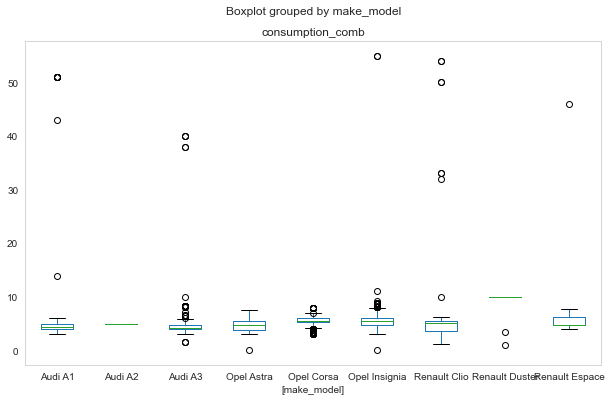

In [65]:
df.boxplot(by= ["make_model"], column =['consumption_comb'], grid = False);

In [66]:
df[(df.consumption_comb > 10)]

,make_model,body_type,price,vat,km,body_color,paint_type,nr._of_doors,nr._of_seats,gearing_type,displacement,cylinders,drive_chain,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,age,previous_owners_2,hp_kw,type_1,fuel_type,warranty_2,upholstery_type,upholstery_color,weight_kg,consumption_comb
500,Audi A1,Sedans,13719,VAT deductible,31255.000,Silver,Metallic,5.000,5.000,Manual,999.000,3.000,front,Euro 6,"Air conditioning,Armrest,Electrical side mirro...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",5.000,3.000,1.000,70.000,Used,Benzine,12.000,Cloth,Grey,1135.000,43.000
535,Audi A1,Compact,12990,VAT deductible,41200.000,Silver,Metallic,5.000,4.000,Manual,999.000,4.000,front,Euro 4,"Air conditioning,Automatic climate control,Ele...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Ski bag,Sport suspension","ABS,Alarm system,Central door lock,Driver-side...",5.000,3.000,1.000,70.000,Used,Benzine,24.000,Cloth,Black,1285.000,13.800
2194,Audi A1,Sedans,21390,VAT deductible,77450.063,Blue,Metallic,5.000,5.000,Manual,999.000,3.000,front,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Central door lock with r...",5.000,3.000,0.000,70.000,New,Benzine,24.000,Cloth,Black,1140.000,51.000
2196,Audi A1,Sedans,21390,VAT deductible,1.000,Red,Metallic,5.000,5.000,Manual,999.000,3.000,front,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Central door lock with r...",5.000,0.000,0.000,70.000,New,Benzine,24.000,Cloth,Black,1140.000,51.000
2197,Audi A1,Sedans,21700,VAT deductible,77450.063,White,Metallic,5.000,5.000,Manual,999.000,3.000,front,Euro 6,"Air conditioning,Automatic climate control,Mul...","Bluetooth,Digital radio",Alloy wheels,"ABS,Central door lock with remote control,Driv...",5.000,3.000,0.000,70.000,New,Benzine,24.000,Cloth,Black,1140.000,51.000
2201,Audi A1,Sedans,20990,VAT deductible,77450.063,Black,Metallic,4.000,5.000,Manual,999.000,3.000,front,Euro 6,"Air conditioning,Automatic climate control,Cru...",Radio,Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",5.000,3.000,0.000,70.000,New,Benzine,36.000,Velour,Black,1140.000,51.000
2210,Audi A1,Sedans,21280,VAT deductible,1.000,Grey,Metallic,5.000,5.000,Manual,999.000,3.000,front,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Central door lock with r...",5.000,0.000,0.000,70.000,New,Benzine,24.000,Cloth,Black,1140.000,51.000
2237,Audi A1,Sedans,20980,VAT deductible,77450.063,Black,Metallic,5.000,5.000,Manual,999.000,3.000,front,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Central door lock with r...",5.000,3.000,0.000,70.000,New,Benzine,24.000,Cloth,Black,1140.000,51.000
4089,Audi A3,Sedans,19500,VAT deductible,23644.000,Blue,Metallic,5.000,5.000,Manual,1598.000,4.000,front,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,On-board computer",Alloy wheels,"ABS,Central door lock,Power steering,Traction ...",6.000,1.000,1.000,85.000,Used,Diesel,48.000,Cloth,Other,1350.000,40.000
4090,Audi A3,Sedans,19500,VAT deductible,32000.000,Grey,Metallic,5.000,5.000,Manual,1598.000,4.000,front,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,Radio...","Alloy wheels,Sport package,Sport seats,Sport s...","ABS,Electronic stability control,Power steering",6.000,2.000,2.000,85.000,Used,Diesel,36.000,Cloth,Other,1350.000,40.000

In [67]:
df[(df.consumption_comb < 3)]

,make_model,body_type,price,vat,km,body_color,paint_type,nr._of_doors,nr._of_seats,gearing_type,displacement,cylinders,drive_chain,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,age,previous_owners_2,hp_kw,type_1,fuel_type,warranty_2,upholstery_type,upholstery_color,weight_kg,consumption_comb
3612,Audi A3,Sedans,38450,Price negotiable,13800.000,Black,Metallic,5.000,5.000,Semi-automatic,1395.000,4.000,4WD,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Sport package,Sport seats,Voice C...","ABS,Adaptive Cruise Control,Alarm system,Centr...",6.000,1.000,1.000,110.000,Used,Electric,48.000,Cloth,Black,1615.000,1.600
3615,Audi A3,Sedans,35899,Price negotiable,20880.000,White,Metallic,5.000,5.000,Semi-automatic,1395.000,4.000,4WD,Euro 6,"Air conditioning,Power windows,Seat ventilatio...","Bluetooth,Radio",Alloy wheels,"ABS,Adaptive Cruise Control,Alarm system,Centr...",6.000,1.000,1.000,110.000,Used,Electric,48.000,Cloth,Black,1615.000,1.600
3617,Audi A3,Sedans,38000,Price negotiable,12000.000,Grey,Metallic,5.000,5.000,Semi-automatic,1395.000,4.000,4WD,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Shift paddles,Sport package,Sport...","ABS,Adaptive Cruise Control,Adaptive headlight...",6.000,1.000,1.000,110.000,Used,Electric,48.000,Part leather,Grey,1615.000,1.600
8217,Opel Astra,Sedans,17850,VAT deductible,4500.000,Red,Metallic,5.000,5.000,Manual,1399.000,4.000,front,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,MP3,On-board co...","Touch screen,Voice Control","ABS,Central door lock,Driver-side airbag,Elect...",6.000,0.000,1.000,92.000,Employee's car,Benzine,60.000,Cloth,Black,1268.000,0.000
10566,Opel Insignia,Station wagon,16900,VAT deductible,59800.000,Black,Metallic,5.000,5.000,Automatic,1956.000,4.000,front,Euro 6,"Air conditioning,Armrest,Automatic climate con...","On-board computer,Radio","Alloy wheels,Touch screen","ABS,Adaptive headlights,Daytime running lights...",6.000,2.000,1.000,125.000,Used,Diesel,12.000,Part leather,Black,1743.000,0.000
13678,Renault Clio,Off-Road,7700,VAT deductible,95000.000,White,Metallic,5.000,5.000,Manual,1461.000,4.000,front,Euro 6,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,CD player,Digital radio,Hands-free e...","Catalytic Converter,Sport package,Sport seats,...","ABS,Adaptive Cruise Control,Alarm system,Centr...",5.000,3.000,1.000,55.000,Used,Diesel,12.000,Cloth,Grey,1162.000,1.200
14902,Renault Duster,Off-Road,10850,VAT deductible,77450.063,White,Uni/basic,5.000,5.000,Manual,1998.000,4.000,4WD,Euro 4,"Air conditioning,Power windows","On-board computer,Radio",Roof rack,"ABS,Central door lock,Driver-side airbag,Isofi...",6.000,3.000,0.000,77.000,New,Benzine,24.000,Cloth,Black,1165.000,1.000


In [68]:
df.consumption_comb.loc[df.consumption_comb > 10] = np.nan

In [69]:
df.consumption_comb.loc[(df.consumption_comb < 3) & (df.fuel_type != "Electric")] = np.nan

In [70]:
df.consumption_comb.isnull().sum()

28

In [71]:
fill(df, "make_model", "body_type", "consumption_comb", "mode")

In [72]:
df.consumption_comb.isnull().sum()

0

# HeatMap

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15915 entries, 0 to 15918
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   body_color           15915 non-null  object 
 6   paint_type           15915 non-null  object 
 7   nr._of_doors         15915 non-null  float64
 8   nr._of_seats         15915 non-null  float64
 9   gearing_type         15915 non-null  object 
 10  displacement         15915 non-null  float64
 11  cylinders            15915 non-null  float64
 12  drive_chain          15915 non-null  object 
 13  emission_class       15915 non-null  object 
 14  comfort&convenience  15915 non-null  object 
 15  entertainment&media  15915 non-null 

In [74]:
df.select_dtypes(include=np.number).columns

Index(['price', 'km', 'nr._of_doors', 'nr._of_seats', 'displacement',
       'cylinders', 'gears', 'age', 'previous_owners_2', 'hp_kw', 'warranty_2',
       'weight_kg', 'consumption_comb'],
      dtype='object')

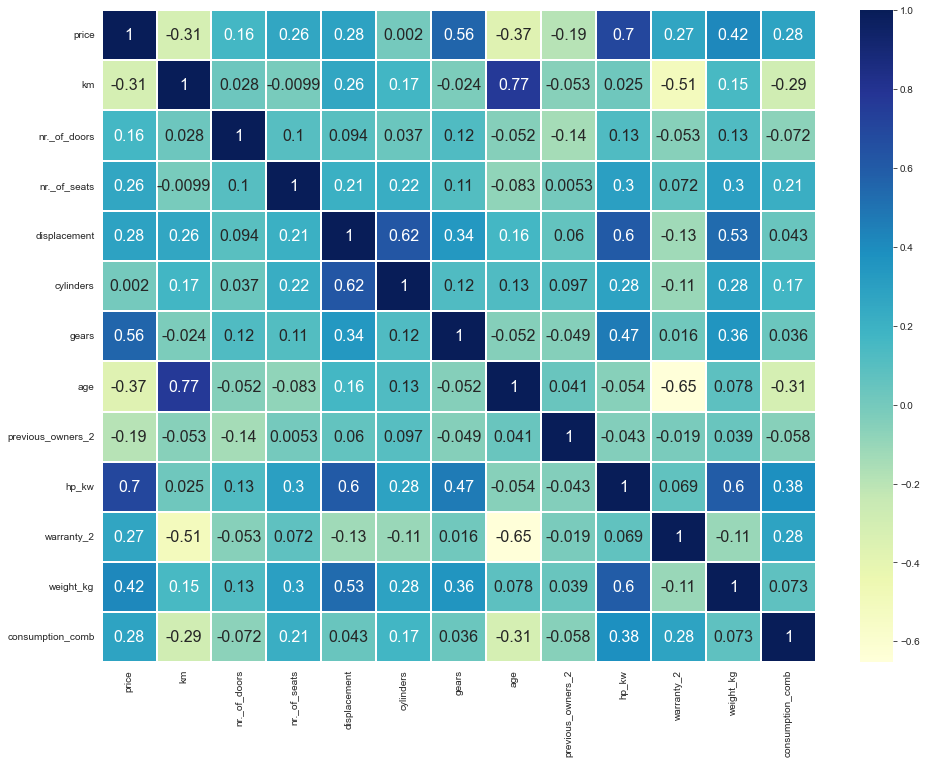

In [75]:
plt.figure(figsize = (16,12))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu", linewidths=0.2, annot_kws = {"size": 16});

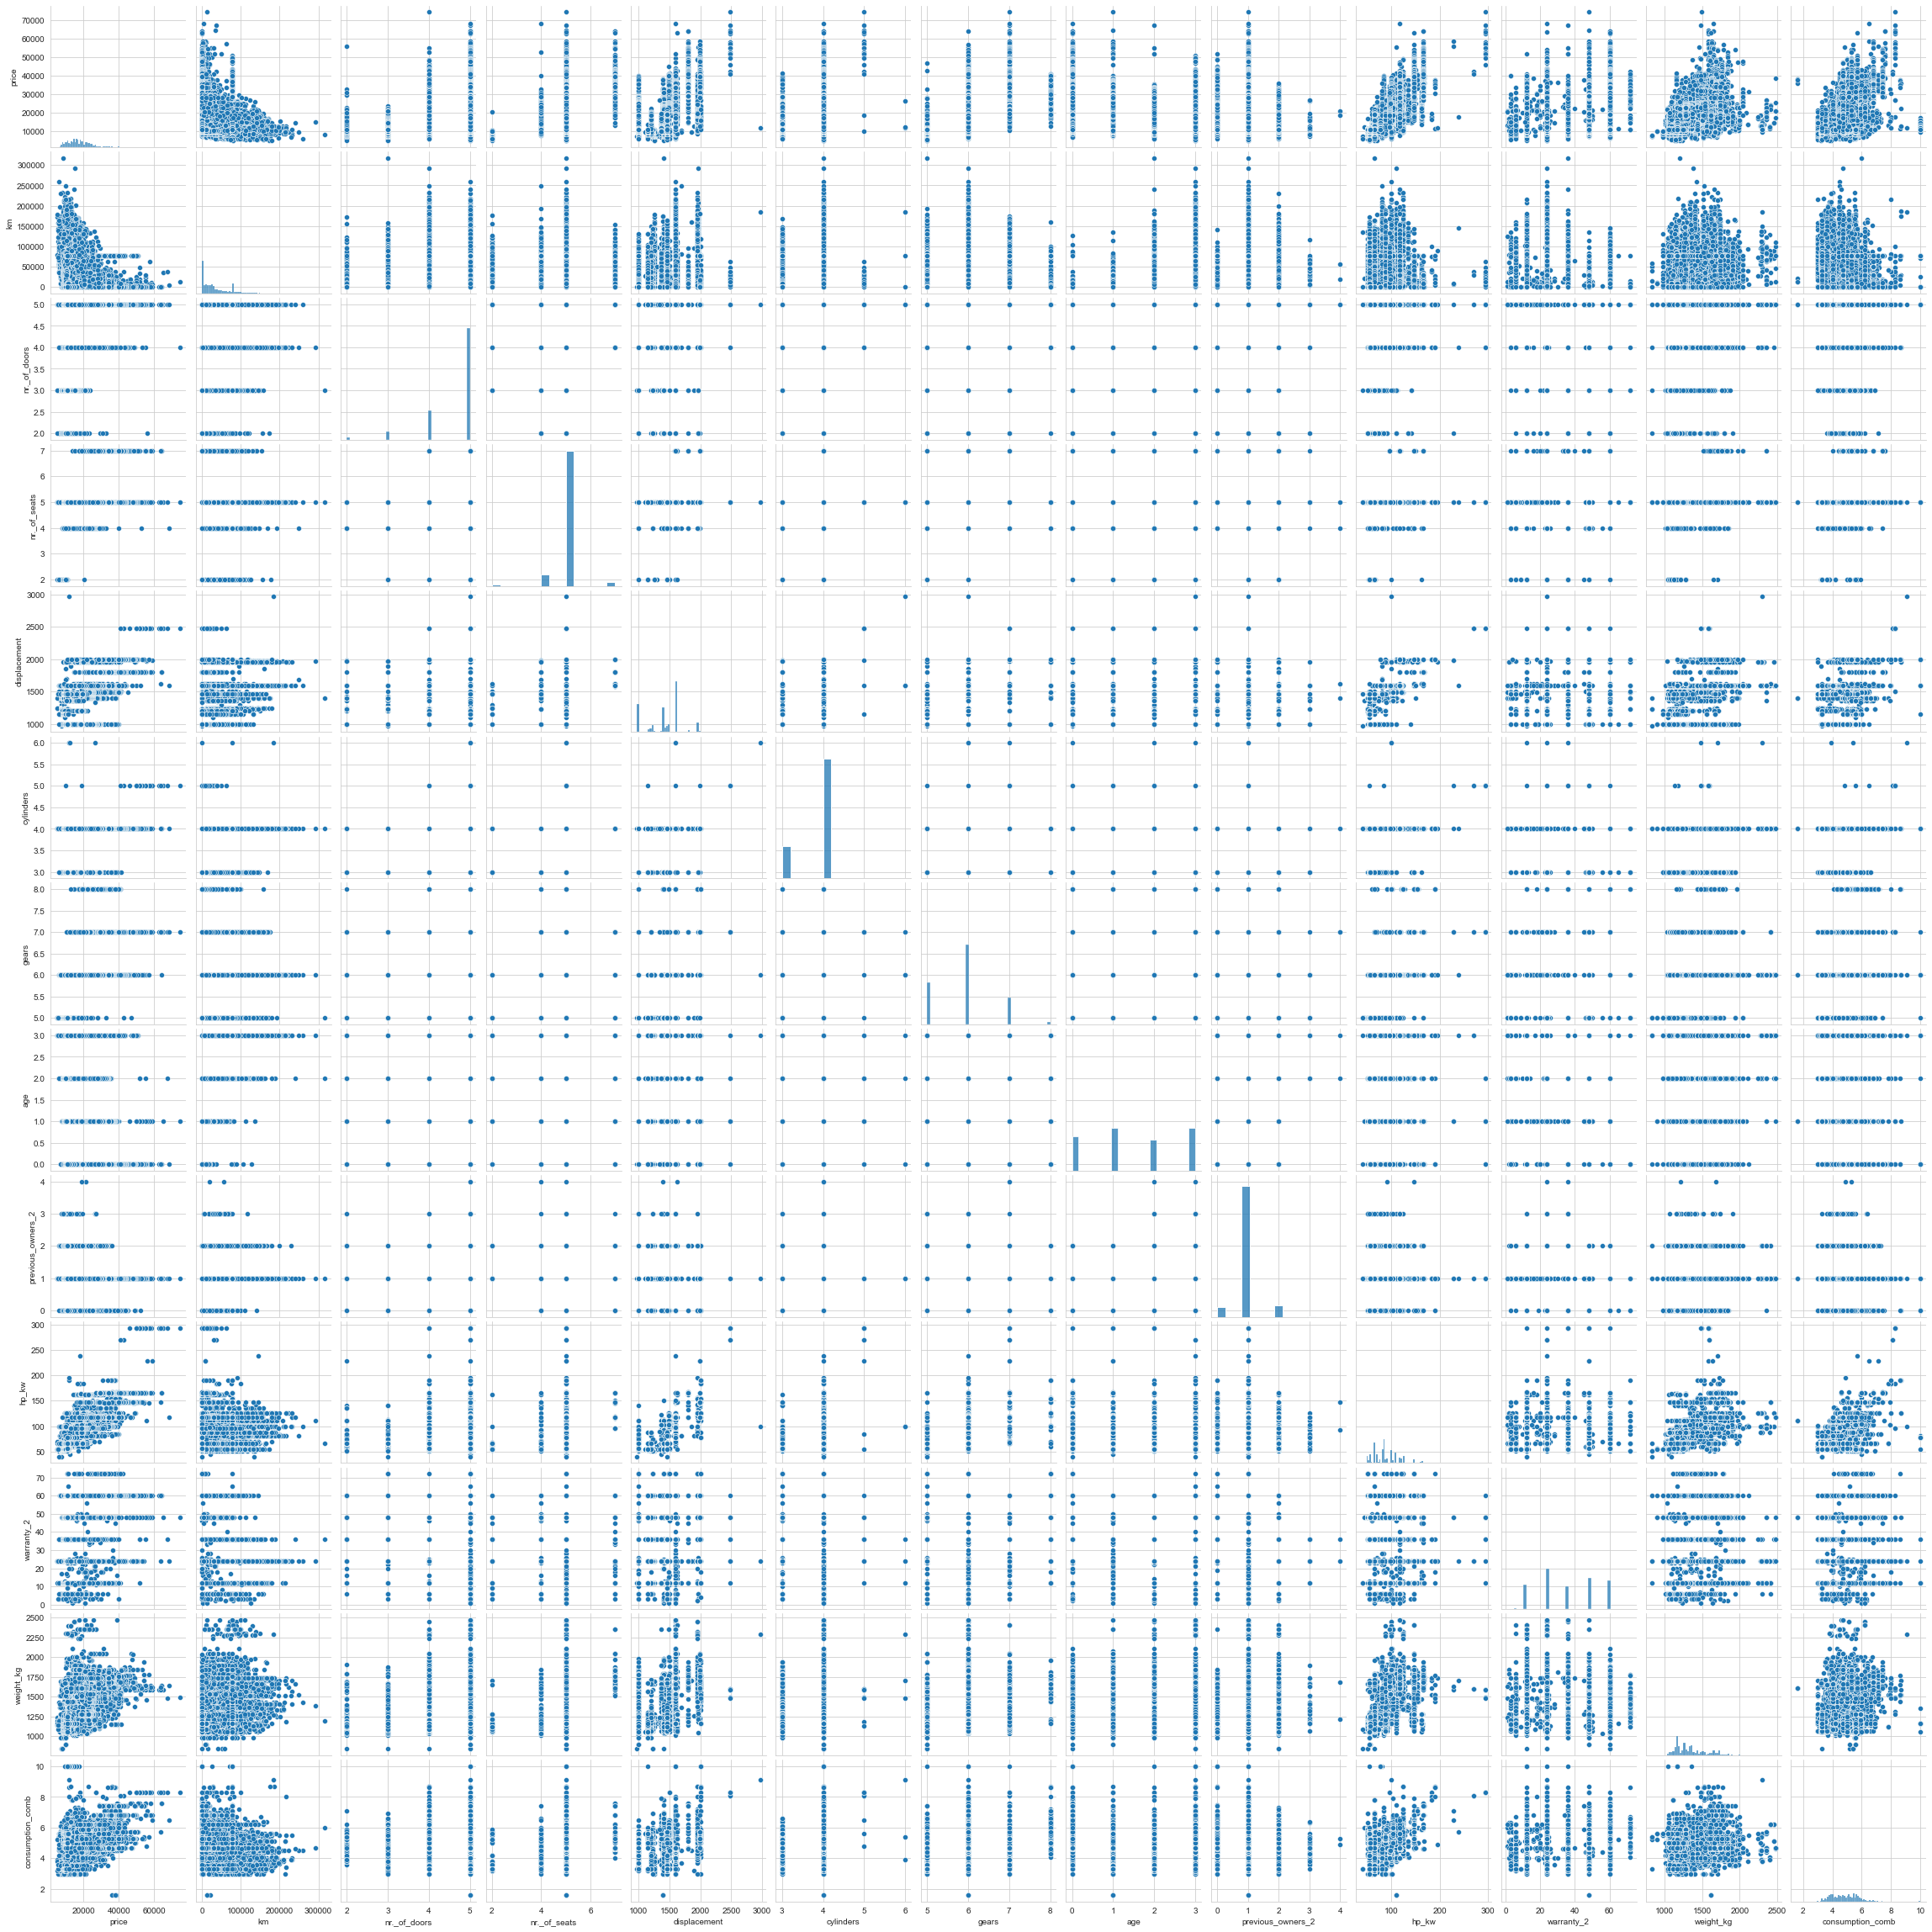

In [76]:
sns.pairplot(df, size = 2.5)
plt.show()

In [77]:
df.to_csv("final_scout_not_dummy.csv",index=False)

In [78]:
df.drop("upholstery_color",axis=1,inplace=True)

# get_dummy

In [79]:
df = df.join(df["comfort&convenience"].str.get_dummies(sep = ",").add_prefix("com_"))
df = df.join(df["entertainment&media"].str.get_dummies(sep = ",").add_prefix("ent_"))
df = df.join(df["extras"].str.get_dummies(sep = ",").add_prefix("ext_"))
df = df.join(df["safety&security"].str.get_dummies(sep = ",").add_prefix("saf_"))

In [80]:
df.drop(["comfort&convenience","entertainment&media","extras","safety&security"], axis=1, inplace=True)

In [81]:
df.shape

(15915, 118)

In [82]:
df_final_scout=pd.get_dummies(df,drop_first=True)

In [83]:
df_final_scout.shape

(15915, 155)

In [84]:
df_final_scout.head()

,price,km,nr._of_doors,nr._of_seats,displacement,cylinders,gears,age,previous_owners_2,hp_kw,warranty_2,weight_kg,consumption_comb,com_Air conditioning,com_Air suspension,com_Armrest,com_Automatic climate control,com_Auxiliary heating,com_Cruise control,com_Electric Starter,com_Electric tailgate,com_Electrical side mirrors,com_Electrically adjustable seats,com_Electrically heated windshield,com_Heads-up display,com_Heated steering wheel,com_Hill Holder,com_Keyless central door lock,com_Leather seats,com_Leather steering wheel,com_Light sensor,com_Lumbar support,com_Massage seats,com_Multi-function steering wheel,com_Navigation system,com_Panorama roof,com_Park Distance Control,com_Parking assist system camera,com_Parking assist system self-steering,com_Parking assist system sensors front,com_Parking assist system sensors rear,com_Power windows,com_Rain sensor,com_Seat heating,com_Seat ventilation,com_Split rear seats,com_Start-stop system,com_Sunroof,com_Tinted windows,com_Wind deflector,...,saf_Traffic sign recognition,saf_Xenon headlights,make_model_Audi A2,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Other,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Green,body_color_Grey,body_color_Orange,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow,paint_type_Perl effect,paint_type_Uni/basic,gearing_type_Manual,gearing_type_Semi-automatic,drive_chain_front,drive_chain_rear,emission_class_Euro 5,emission_class_Euro 6,type_1_Employee's car,type_1_New,type_1_Pre-registered,type_1_Used,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG/CNG,upholstery_type_Full leather,upholstery_type_Part leather,upholstery_type_Velour,upholstery_type_alcantara
0,15770,56013.000,5.000,5.000,1422.000,3.000,7.000,3.000,2.000,66.000,24.000,1220.000,3.800,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0
1,14500,80000.000,3.000,4.000,1798.000,4.000,7.000,2.000,1.000,141.000,36.000,1255.000,5.600,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,14640,83450.000,4.000,4.000,1598.000,4.000,7.000,3.000,1.000,85.000,24.000,1255.000,3.800,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0
3,14500,73000.000,3.000,4.000,1422.000,3.000,6.000,3.000,1.000,66.000,24.000,1195.000,3.800,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0
4,16790,16200.000,5.000,5.000,1422.000,3.000,6.000,3.000,1.000,66.000,24.000,1195.000,4.100,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0


In [85]:
df_final_scout.to_csv("final_scout_full_dummy.csv",index=False)